Here we use the Python module Rebound to simulate planet and asteroid orbits. 

https://rebound.readthedocs.io/en/latest/

First we install Rebound.

In [1]:
!pip install rebound

In [2]:
#matplotlib import and setup
import matplotlib                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                                                
from matplotlib.ticker import AutoMinorLocator   
                                                                              
matplotlib.rcParams.update({'font.size': 18})                                                                                               
                                                                                                                                            
matplotlib.rcParams['xtick.direction'] = 'in'                                                                                               
matplotlib.rcParams['ytick.direction'] = 'in'                                                                                               
matplotlib.rcParams['xtick.top'] = True                                                                                                     
matplotlib.rcParams['ytick.right'] = True                                                                                                   
                                                                                                                                            
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'                                                                                           
matplotlib.rcParams.update({'pgf.rcfonts' : False})                                                                                         
                                                                                                                                            
matplotlib.rcParams['axes.linewidth'] = 2                                                                                                   
matplotlib.rcParams['xtick.major.size'] = 6                                                                                                
matplotlib.rcParams['xtick.major.width'] = 2                                                                                                
matplotlib.rcParams['xtick.minor.size'] = 4                                                                                                
matplotlib.rcParams['xtick.minor.width'] = 0.5                                                                                                
                                                                                                                                            
matplotlib.rcParams['ytick.major.size'] = 6                                                                                                
matplotlib.rcParams['ytick.major.width'] = 2                                                                                                
matplotlib.rcParams['ytick.minor.size'] = 4       

We then import the needed modules.

In [3]:
import rebound
import numpy as np

The goal in this document is to import a textfile with the data for the Sun, desired planets, moons and asteroids and then create a Rebound simulation that iterates over their positions, forward in time. We start by definining the function that reads the textfile.
The format of the readable list in the textfile is expected to be 

*SPK-ID(from NASA),  Name,  Diameter(optional),  Mass(optional),*

but this can easily be adjusted in the code below. 

In [4]:
def read_file(filename):
    '''Takes a textfile with entries in rows of the following format
    SPK-ID(from NASA),  Name,  Diameter(optional),  Mass(optional),
    The functions returns the four categories in seperate lists.'''

    file = open((filename), "r")
    code_list = []
    name_list = []
    diameter_list = []
    mass_list = []

    lines = file.readlines()
    for line in lines: 
        this_line = []
        try:
            this_line = str(line).strip("\\n']")
            this_line = this_line.split(",")

            code = str(this_line[0])
            name = str(this_line[1]).strip("\t")
            try:
                diameter = float(this_line[2])
            except IndexError:
                diameter = "n/a"
            except ValueError:
                diameter = "n/a"
           
            try:
                mass = float(this_line[3])
            except IndexError:
                mass = "n/a"
            except ValueError:
                diameter = "n/a"
         
            code_list.append(code)
            name_list.append(name)
            diameter_list.append(diameter)
            mass_list.append(mass)
        except IndexError:
            print("The following line ignored due to data corruption: \n"+line)
            continue
      
    return code_list, name_list, diameter_list, mass_list

Using the function above we create the list of data input. 

In [5]:
(code_list, name_list, diameter_list, mass_list) = read_file("testlist.txt")
print(name_list)  # Here we can check the created input.

['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Ceres', 'Vesta', 'Pallas', 'Hygiea', 'Interamnia', 'Europa', 'Davida', 'Euphrosyne', 'Patientia', 'Juno']


We create the Rebound simulation based on the provided SPK-ID's. 

This is also possible by the names of the bodies but since some share names, this method can run into problems, i.e. listing Europa will load the Jovian moon, not the asteroid. SPK-ID for asteroids can be found at 

https://ssd.jpl.nasa.gov/tools/sbdb_query.html

moon codes at

https://ssd.jpl.nasa.gov/sats/phys_par/

planet codes are simply 1 through 8 and the Sun has the code 10. 

In [11]:
def create_sim(file_with_objects : str):
    '''
    Read a file with object names/SPK-ID codes
    and create a rebound simulation.
    '''
    sim = rebound.Simulation()
    code_list, name_list, diameter_list, mass_list = read_file(file_with_objects)
    for entry in code_list:
        sim.add(str(entry))
    return sim

We can now visualize the created simulation in Rebound. 

In [12]:
sim =  create_sim("testlist.txt") 

Searching NASA Horizons for '10'... 
Found: Sun (10) 
Searching NASA Horizons for '1'... 
Found: Mercury Barycenter (199) 
Searching NASA Horizons for '2'... 
Found: Venus Barycenter (299) 
Searching NASA Horizons for '3'... 
Found: Earth-Moon Barycenter (3) 
Searching NASA Horizons for '4'... 
Found: Mars Barycenter (4) 
Searching NASA Horizons for '5'... 
Found: Jupiter Barycenter (5) 
Searching NASA Horizons for '6'... 
Found: Saturn Barycenter (6) 
Searching NASA Horizons for '7'... 
Found: Uranus Barycenter (7) 
Searching NASA Horizons for '8'... 
Found: Neptune Barycenter (8) 
Searching NASA Horizons for 'A801 AA'... 
Found: 1 Ceres (A801 AA) 
Searching NASA Horizons for 'A807 FA'... 


/home/haan7944/.local/lib/python3.9/site-packages/rebound/horizons.py:168: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: 4 Vesta (A807 FA) 
Searching NASA Horizons for 'A802 FA'... 
Found: 2 Pallas (A802 FA) 
Searching NASA Horizons for 'A849 GA'... 
Found: 10 Hygiea (A849 GA) 
Searching NASA Horizons for 'A910 TC'... 
Found: 704 Interamnia (A910 TC) 
Searching NASA Horizons for 'A858 CA'... 
Found: 52 Europa (A858 CA) 
Searching NASA Horizons for 'A903 KB'... 
Found: 511 Davida (A903 KB) 
Searching NASA Horizons for 'A854 RA'... 
Found: 31 Euphrosyne (A854 RA) 
Searching NASA Horizons for 'A899 XA'... 
Found: 451 Patientia (A899 XA) 
Searching NASA Horizons for 'A804 RA'... 
Found: 3 Juno (A804 RA) 


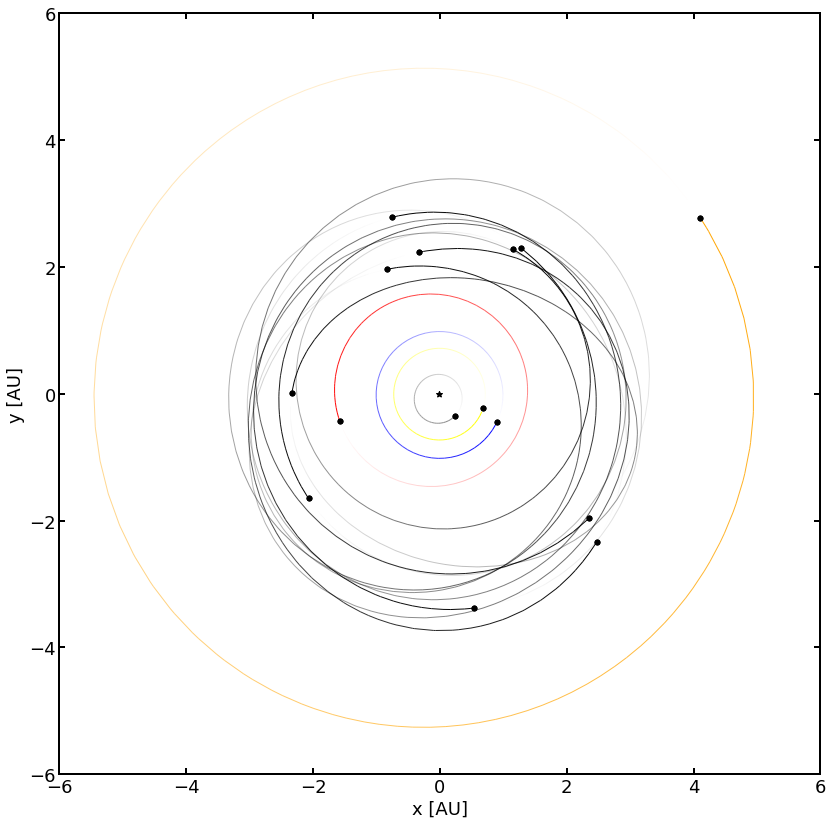

In [ ]:


# fig, ax = plt.subplots(figsize=(8,8))

from IPython.display import display, clear_output
import matplotlib.pyplot as plt

"The colorlist below is just for clearly visualizing a list with the 8 planets first "
"and then up to 20 asteroids and/or moons."
colorlist = ['grey', 'yellow', 'blue', 'red', 'orange', 'yellow', 'cyan', 'cyan', 
             'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 
             'black', 'black', 'black' , 'black' , 'black' , 'black' , 'black' , 
             'black' , 'black' , 'black' , 'black' , 'black' ]

op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=colorlist, periastron=False, xlim=[-6,6], ylim=[-6,6], figsize=[14,14]) # change limits to zoom

fig = op.fig
for i in range(400):
    clear_output(wait=True) # clears plot of last iteration
    op.sim.integrate(sim.t+0.1)
    op.update()       # update data
    fig.canvas.draw() # redraw figure
    display(fig)      # display figure
    fig.savefig(f'{i:05}.png',bbox_inches='tight') #Seems to only save the first picture, then 30 blanks.
    plt.close(fig)
    
    

In [ ]:
import imageio
import os

# Set the directory path where the PNG images are stored
image_dir = "./"

# Get a list of PNG image file names in the directory
png_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')])

# Set the output file path for the GIF
output_path = "output.gif"

# Create the GIF from the PNG images using imageio
with imageio.get_writer(output_path, mode='I') as writer:
    for png_file in png_files:
        image = imageio.imread(png_file)
        writer.append_data(image)


In [6]:
#Uncomment to show gif
#from IPython.display import Image
#Image(filename="output.gif")